## Purpose:

To plot the calculated precipitation indices against WNV incidence rates for the urban counties.

In [2]:
import glob 
import matplotlib.pyplot as plt
import pandas as pd

### Load WNV Incidence Data

In [3]:
wnv = pd.read_csv('../../data/wnv/WNV_NI_NNI_1999to2015_prevalence_incidence_final_20180530_urban_counties.csv')
wnv = wnv.set_index('GEOID10', drop=True)

In [4]:
incidence = wnv.filter(like='NI_IR_', axis='columns')
incidence.head()

,NI_IR_1999,NI_IR_2000,NI_IR_2001,NI_IR_2002,NI_IR_2003,NI_IR_2004,NI_IR_2005,NI_IR_2006,NI_IR_2007,NI_IR_2008,NI_IR_2009,NI_IR_2010,NI_IR_2011,NI_IR_2012,NI_IR_2013,NI_IR_2014,NI_IR_2015
GEOID10,,,,,,,,,,,,,,,,,
31109,0.0,0.0,0.0,3.482999,10.659885,0.377235,1.487719,0.734522,0.362303,0.357647,0.0,0.349478,0.0,1.702962,3.025322,0.993059,1.308451
46099,0.0,0.0,0.0,0.000000,9.756732,1.284951,1.901406,3.112744,0.611333,0.000000,0.0,0.000000,0.0,3.988740,0.557367,1.643331,0.000000
39003,0.0,0.0,0.0,2.764518,0.000000,0.000000,0.000000,1.874133,0.000000,0.000000,0.0,0.941575,0.0,4.748564,0.000000,0.000000,0.000000
42007,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.592038
37037,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


### Set Precipitation Indices Directory

In [5]:
indices_dir = '../../data/narr/precipitation_indices/'

### Define Indices and File Paths

1. aggregate_filtered: Sum of all precipitation, filtered for values > 0 C
2. aggregate_unfiltered: Sum of all precipitation
3. total_dry_days_filtered: Count of all days with < 1 mm precipitation on the filtered data-set
4. total_dry_days_unfiltered: Count of all days with < 1mm precipitation on the unfiltered data-set
5. maximum_consecutive_dry_days: Maximum consecutive days with < 1 mm precipitation on the filtered data-set
6. gini: Gini index of inequality as defined by pysal
7. theil: Theil index of inequality as defined by pysal

In [6]:
indices = {'aggregate_filtered': indices_dir + 'aggregated/filtered_aggregated_precipitation.csv',
         'aggregate_unfiltered': indices_dir + 'aggregated/unfiltered_aggregated_precipitation.csv',
         'total_dry_days_filtered': indices_dir + 'dry/dry_days_filtered.csv',
         'total_dry_days_unfiltered': indices_dir + 'dry/dry_days_unfiltered.csv',
         'maximum_consecutive_dry_days': indices_dir + 'dry/max_consecutive_dry_days.csv',
         'gini': indices_dir + 'gini/gini_weekly.csv',
         'theil': indices_dir + 'theil/theil_weekly.csv'
        }

### Look at a sample of the data

In [7]:
frame = pd.read_csv(indices['gini'])
frame.head()

,GEOID,NAME,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,31109,Lancaster,0.618834,0.594535,0.565162,0.659842,0.576027,0.559183,0.586500,0.616216,0.585818,0.587615,0.537210,0.604461,0.566393,0.625627,0.606329,0.634289,0.557881
1,46099,Minnehaha,0.671339,0.529183,0.642092,0.613020,0.569503,0.582077,0.538878,0.514873,0.557662,0.550200,0.505483,0.550630,0.482606,0.499087,0.520561,0.553150,0.479034
2,39003,Allen,0.476530,0.478515,0.493193,0.487256,0.531183,0.497386,0.491940,0.435123,0.536354,0.486576,0.451581,0.470039,0.487661,0.471319,0.513575,0.464592,0.502330
3,42007,Beaver,0.516701,0.484822,0.450823,0.402205,0.436527,0.458429,0.445587,0.433261,0.424477,0.386357,0.368958,0.438339,0.377630,0.434748,0.402942,0.376104,0.415081
4,37037,Chatham,0.532100,0.470440,0.529927,0.518984,0.441739,0.425189,0.430605,0.453663,0.517138,0.467245,0.390136,0.545892,0.402373,0.415602,0.444209,0.469702,0.430221


### Function to Plot Index

In [8]:
def plot_index(file, x_label=None):
    # file: csv file containing precipitation index
    # incidence: pandas dataframe containing WNV incidence (created above)
    frame = pd.read_csv(file)
    frame = frame.set_index('GEOID', drop=True)
    frame = frame.drop('NAME', axis='columns')
    fig, ax = plt.subplots(1,1, figsize=(16,8))
   
    if x_label is None:
        name = file[file.rfind('/')+1:file.rfind('.')]
        ax.set_xlabel(name)
    else:
        ax.set_xlabel(x_label)
        
    ax.scatter(frame, incidence)
    ax.set_ylabel('West Nile Virus Incidence Rate (cases per 100,000)')
    return ax

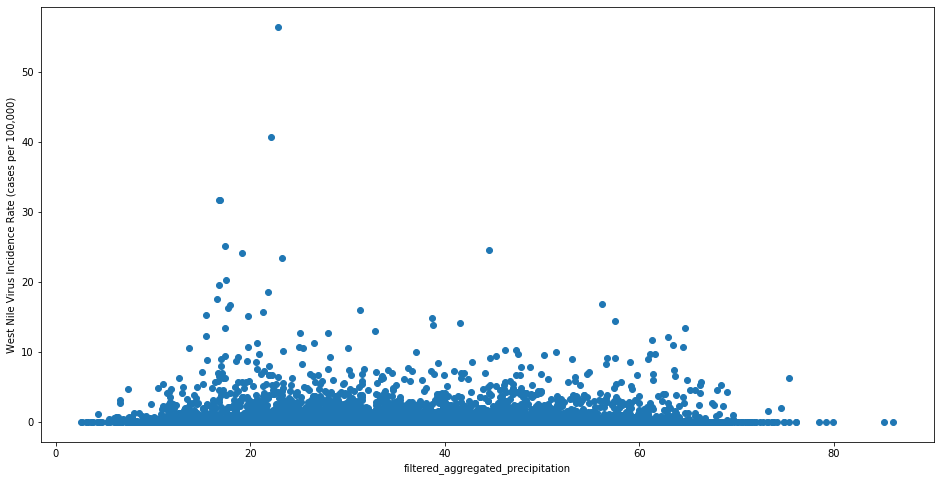

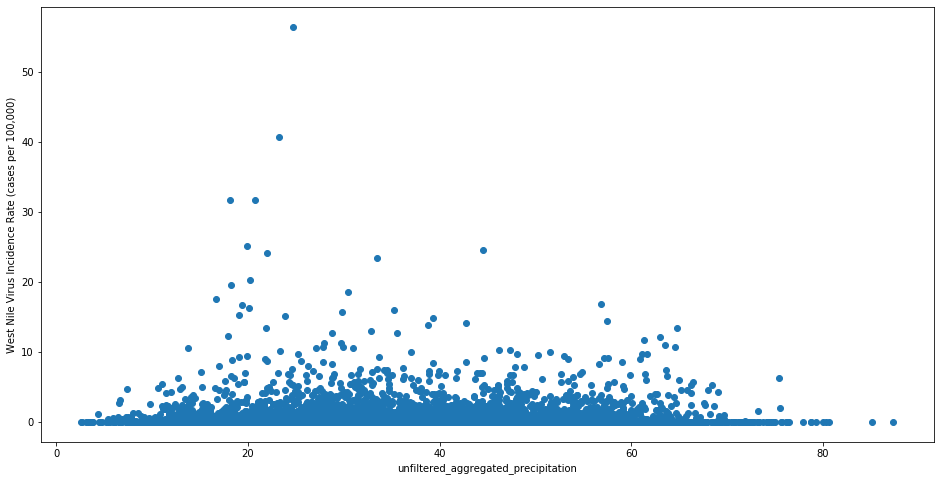

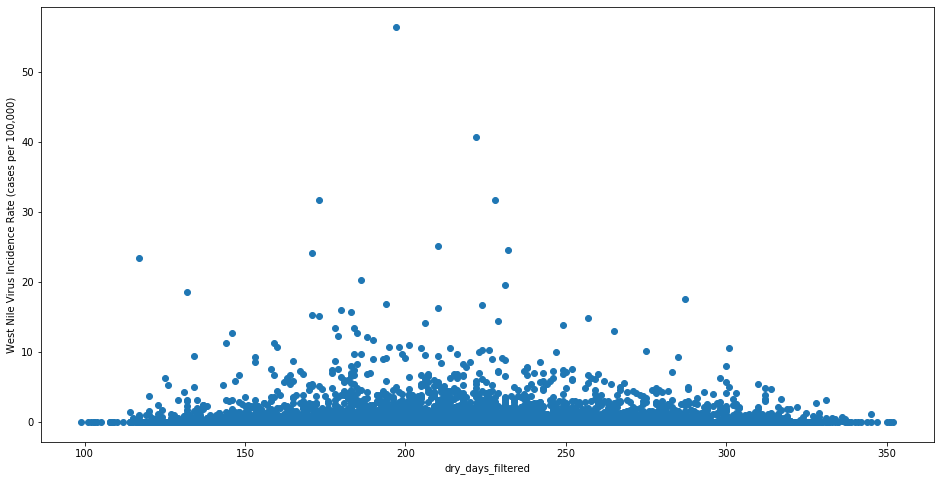

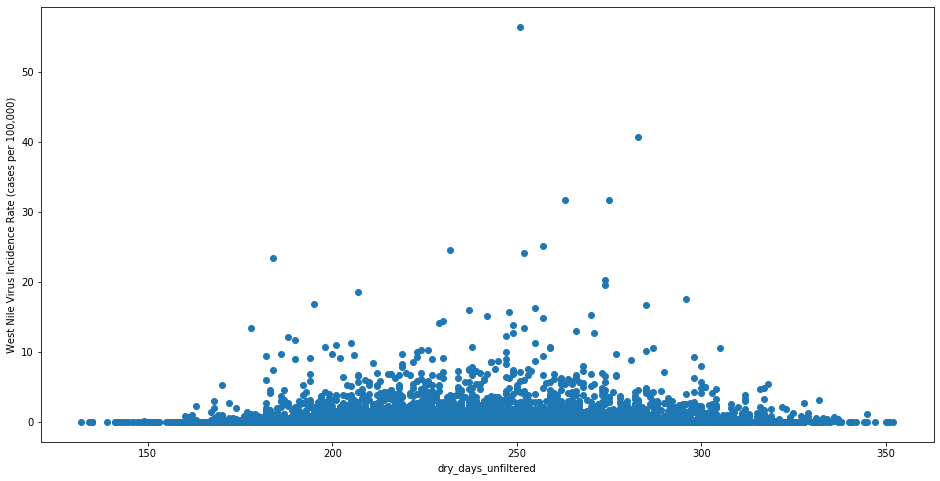

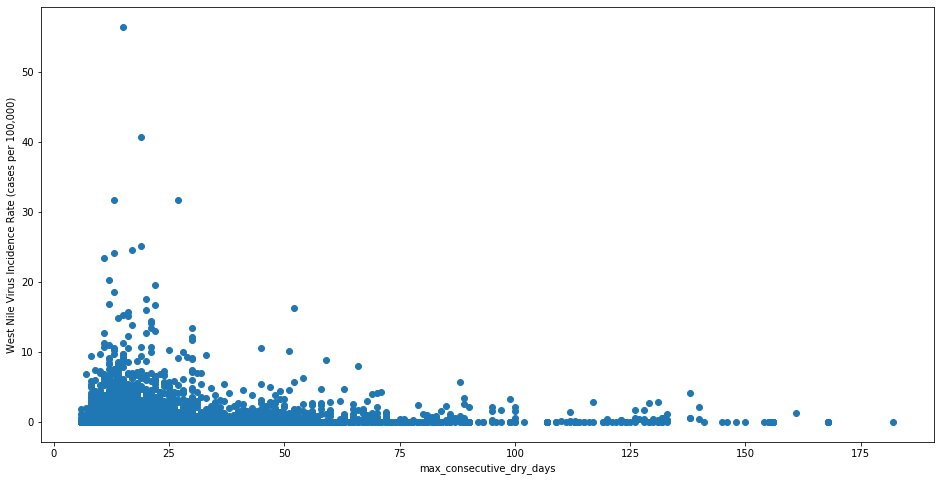

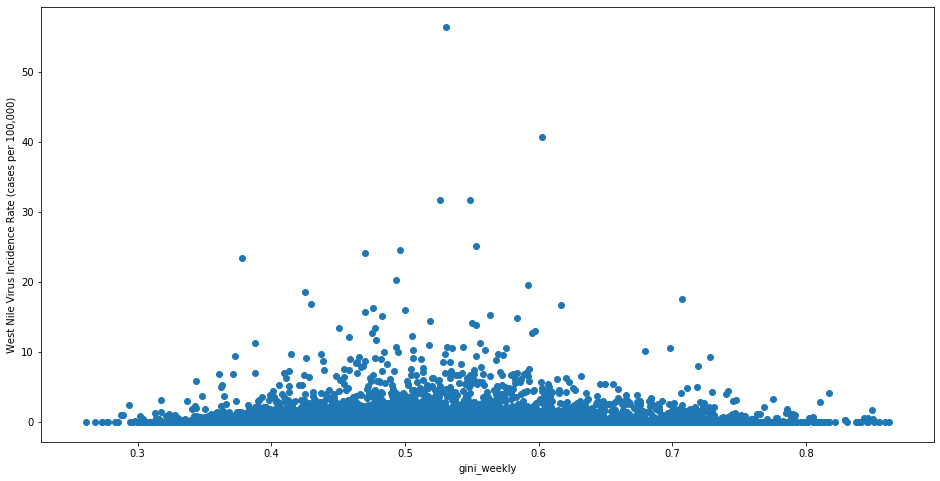

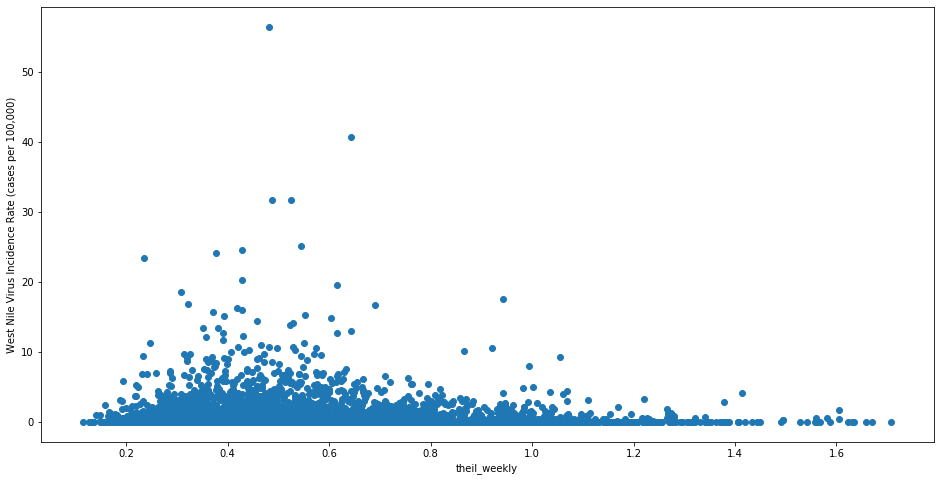

In [9]:
for index in indices:
    ax = plot_index(indices[index])
    ax.figure.savefig('./plots/scatter/' + index + '.svg', dpi=900)

## Try Hexagonal Binning

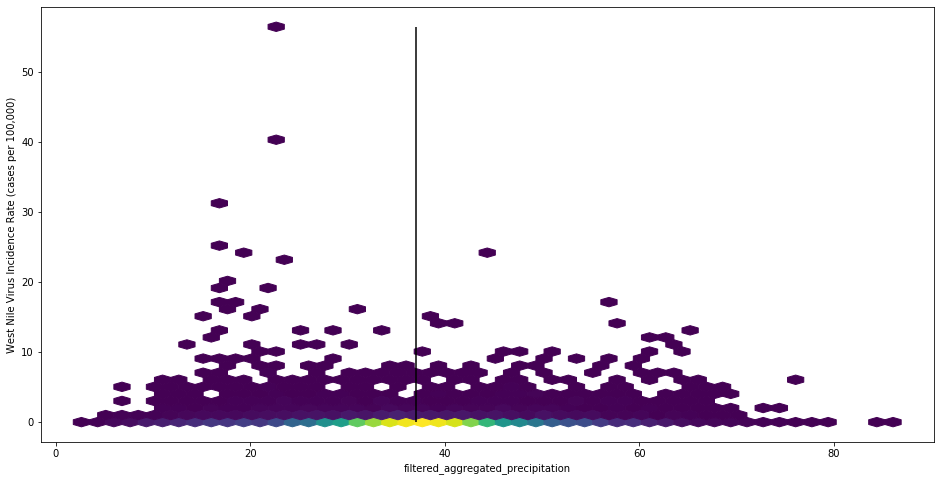

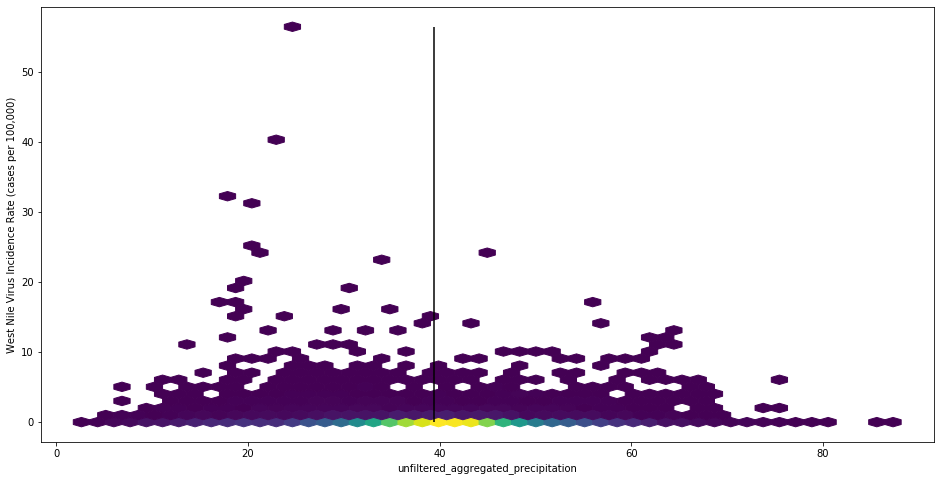

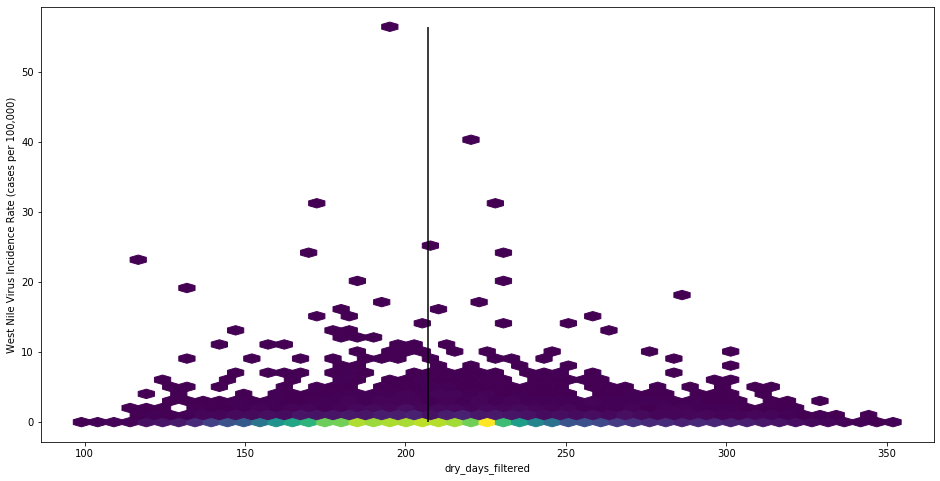

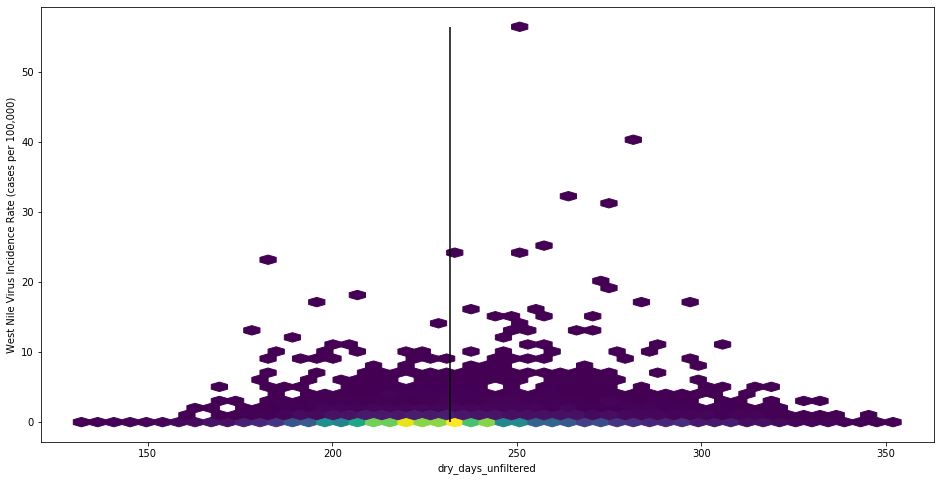

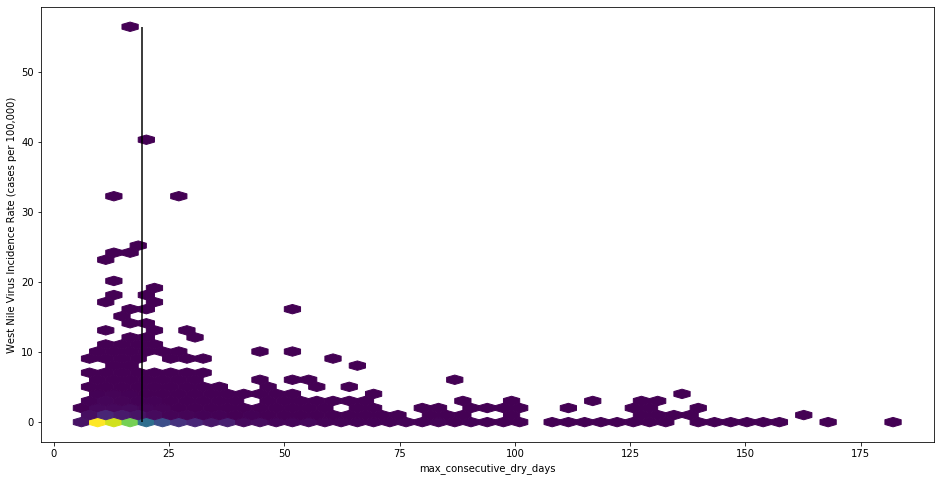

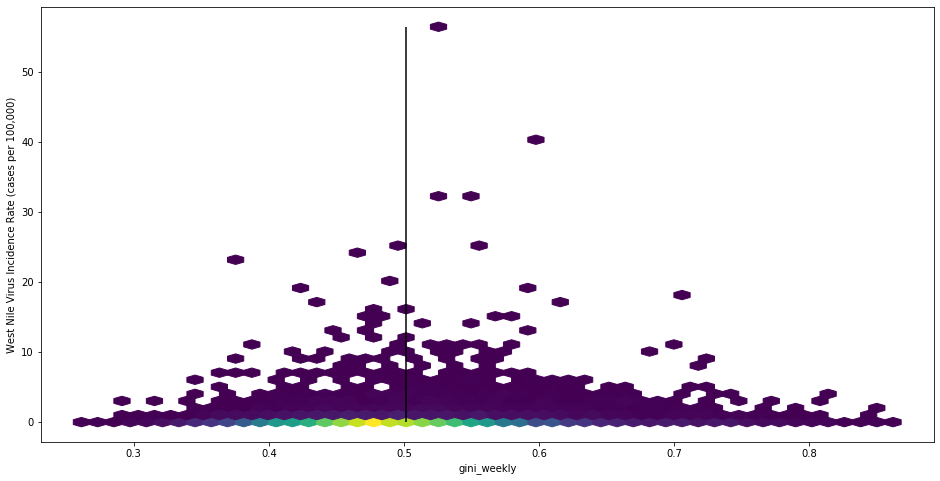

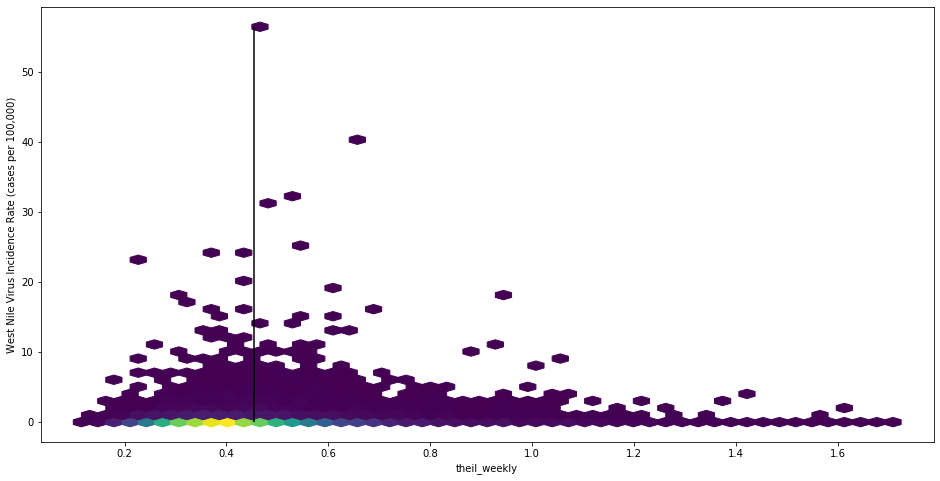

In [10]:
def plot_index_hexagonal(file, x_label=None):
    # file: csv file containing precipitation index
    # incidence: pandas dataframe containing WNV incidence (created above)
    frame = pd.read_csv(file)
    frame = frame.set_index('GEOID', drop=True)
    frame = frame.drop('NAME', axis='columns')
    fig, ax = plt.subplots(1,1, figsize=(16,8))
   
    if x_label is None:
        name = file[file.rfind('/')+1:file.rfind('.')]
        ax.set_xlabel(name)
    else:
        ax.set_xlabel(x_label)
        
    plt.vlines(frame.mean().mean(), ymin=0, ymax=incidence.max().max(), label='Mean')
    ax.hexbin(frame, incidence, gridsize=50, mincnt=1)
    ax.set_ylabel('West Nile Virus Incidence Rate (cases per 100,000)')
    return ax
    print('Mean:', frame.mean().mean())
    
for index in indices:
    ax = plot_index_hexagonal(indices[index])
    ax.figure.savefig('./plots/hexagonal/' + index + '.svg', dpi=900)
